  # Precisamos responder algumas perguntas de negócio para ajudar esta empresa de logística 

-  01) Qual é o total de faturamento?

-  02) Qual é a quantidade de motoristas?

-  03) Qual é a quantidade de devolução dos produtos por Motorista?

-  04) Qual a quantidade de devolução dos produtos ?

-  05) Quais são os motivos de devolução dos produtos por Motorista?

-  06) Mapear quantos produtos foram entregues fora do prazo.

-  07) Quais motoristas atrasam mais a entrega dos produtos?


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

 Carrega a base de dados que está no formato do **excel** e mostra a tabela em formato de data frame


In [ ]:
tabela_logistica = pd.read_excel('BD_Logistica.xlsx')

pd.DataFrame(tabela_logistica)

,Nº Pedido,Cliente - Motorista,Data Emissão Pedido,Data Entrega Prevista,Destino,Itens,R$ Faturados,Saída para Entrega,Data Entrega Real,Qtd Devolução,Mot. Devolução,Dias Para Entrega,Status
0,A3,WALMART-FELIPE SILVA,2019-01-27,2019-02-06,SP,3,139.5,2019-01-29,2019-02-03,0,S/ Devolu.,7,No Prazo
1,A4,MAGAZINE LUIZA-TÚLIO SILVEIRA,2019-01-28,2019-02-07,RJ,4,134.4,2019-02-09,2019-02-12,0,S/ Devolu.,15,Atrasado
2,A7,MAGAZINE LUIZA-VALDIR ESPINOSA,2019-02-04,2019-02-14,SP,5,79.5,2019-02-07,2019-02-14,1,Produto Errado,10,No Prazo
3,A12,MAGAZINE LUIZA-MARCOS LEROY,2019-02-18,2019-02-28,SP,20,326.0,2019-02-23,2019-02-25,11,Produto Errado,7,No Prazo
4,A15,WALMART-LUIZ PARDAL,2019-02-21,2019-03-03,RJ,12,597.6,2019-02-28,2019-03-07,0,S/ Devolu.,14,Atrasado
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4277,A9675,MAGAZINE LUIZA-VALDIR ESPINOSA,2021-11-27,2021-12-07,RJ,16,763.2,2021-12-12,2021-12-15,1,Produto Errado,18,Atrasado
4278,A9676,WALMART-LUIZ PARDAL,2021-11-28,2021-12-08,SP,14,226.8,2021-12-10,2021-12-12,1,Produto Errado,14,Atrasado
4279,A9680,CASA E VIDEO-TÚLIO SILVEIRA,2021-12-02,2021-12-12,SP,17,821.1,2021-12-19,2021-12-20,2,Danificado,18,Atrasado
4280,A9681,RICARDO ELETRO-MARCOS LEROY,2021-12-03,2021-12-13,SP,1,49.8,2021-12-08,2021-12-17,0,S/ Devolu.,14,Atrasado


01) Qual é o total de faturamento?<br>


In [ ]:

soma_faturados = tabela_logistica['R$ Faturados'].sum()

soma_faturados_formatada = 'R$ {:,.2f}'.format(soma_faturados)

print(soma_faturados_formatada)


R$ 1,451,761.70


Tratamento dos dados



1.   Excluimos a coluna nº do pedido
2.   Dividimos a coluna Cliente-Motorista e excluimos a tabela Cliente-Motorista
3. Realocamos a coluna Cliente e Motorista para o inicio da tabela

In [ ]:
# tabela_logistica.drop('Nº do Pedido', axis=1, inplace=True)

# tabela_logistica[['Cliente', 'Motorista']] = tabela_logistica['Cliente-Motorista'].str.split('-', expand=True)

# recoloca as colunas cliente e motorista para o inicio da tabela
colunas = ['Cliente'] + ['Motorista'] + [col for col in tabela_logistica.columns if col not in ['Cliente', 'Motorista']]
tabela_logistica = tabela_logistica[colunas]

display(tabela_logistica)

,Cliente,Motorista,Data Emissão Pedido,Data Entrega Prevista,Destino,Itens,R$ Faturados,Saída para Entrega,Data Entrega Real,Qtd Devolução,Mot. Devolução,Dias Para Entrega,Status
0,WALMART,FELIPE SILVA,2019-01-27,2019-02-06,SP,3,139.5,2019-01-29,2019-02-03,0,S/ Devolu.,7,No Prazo
1,MAGAZINE LUIZA,TÚLIO SILVEIRA,2019-01-28,2019-02-07,RJ,4,134.4,2019-02-09,2019-02-12,0,S/ Devolu.,15,Atrasado
2,MAGAZINE LUIZA,VALDIR ESPINOSA,2019-02-04,2019-02-14,SP,5,79.5,2019-02-07,2019-02-14,1,Produto Errado,10,No Prazo
3,MAGAZINE LUIZA,MARCOS LEROY,2019-02-18,2019-02-28,SP,20,326.0,2019-02-23,2019-02-25,11,Produto Errado,7,No Prazo
4,WALMART,LUIZ PARDAL,2019-02-21,2019-03-03,RJ,12,597.6,2019-02-28,2019-03-07,0,S/ Devolu.,14,Atrasado
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4277,MAGAZINE LUIZA,VALDIR ESPINOSA,2021-11-27,2021-12-07,RJ,16,763.2,2021-12-12,2021-12-15,1,Produto Errado,18,Atrasado
4278,WALMART,LUIZ PARDAL,2021-11-28,2021-12-08,SP,14,226.8,2021-12-10,2021-12-12,1,Produto Errado,14,Atrasado
4279,CASA E VIDEO,TÚLIO SILVEIRA,2021-12-02,2021-12-12,SP,17,821.1,2021-12-19,2021-12-20,2,Danificado,18,Atrasado
4280,RICARDO ELETRO,MARCOS LEROY,2021-12-03,2021-12-13,SP,1,49.8,2021-12-08,2021-12-17,0,S/ Devolu.,14,Atrasado


02) Quantidade de Motoristas

In [ ]:
qtd_motoristas = tabela_logistica['Motorista'].nunique()
motoristas = tabela_logistica['Motorista'].unique()
print(motoristas)
print(qtd_motoristas)

['FELIPE SILVA' 'TÚLIO SILVEIRA' 'VALDIR ESPINOSA' 'MARCOS LEROY'
 'LUIZ PARDAL' 'JOÃO GOMES']
6


03) Qual é a quantidade de devolução dos produtos por Motorista? <br>


In [ ]:
qnt_dev_por_motorista = tabela_logistica.groupby('Motorista')[' Qtd Devolução'].sum().reset_index()

display(qnt_dev_por_motorista)

,Motorista,Qtd Devolução
0,FELIPE SILVA,784
1,JOÃO GOMES,2043
2,LUIZ PARDAL,897
3,MARCOS LEROY,2539
4,TÚLIO SILVEIRA,843
5,VALDIR ESPINOSA,866


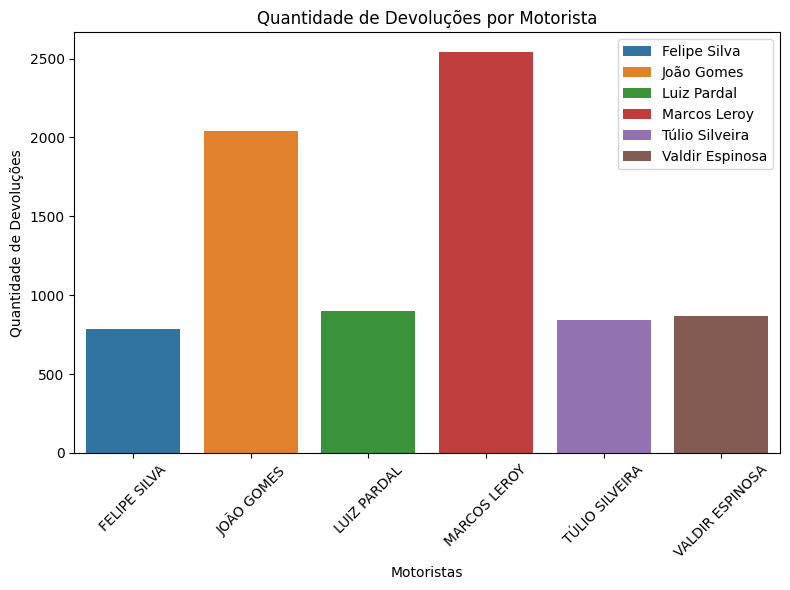

In [ ]:
custom_palette = ['Felipe Silva', 'João Gomes', 'Luiz Pardal', 'Marcos Leroy', 'Túlio Silveira', 'Valdir Espinosa']


plt.figure(figsize=(8,6))
sns.barplot(data=qnt_dev_por_motorista, x='Motorista', y=' Qtd Devolução', hue= custom_palette)

plt.title('Quantidade de Devoluções por Motorista')
plt.xlabel('Motoristas')
plt.ylabel('Quantidade de Devoluções')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

04) Qual a quantidade de devolução dos produtos ?

,Mot. Devolução,Quantidade
0,Produto Errado,1562
1,Danificado,1339
2,S/ Devolu.,1060
3,Arrependimento,321


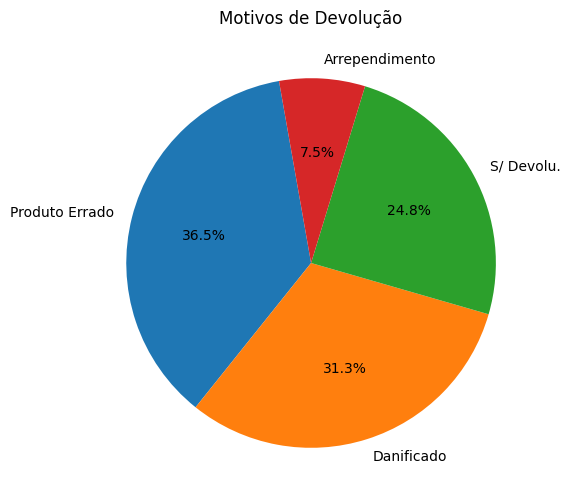

In [ ]:
#conta a quantidade de motivos pro dev.
contagem_motivos = tabela_logistica['Mot. Devolução'].value_counts().reset_index()
#organiza em colunas
contagem_motivos.columns = ['Mot. Devolução', 'Quantidade']
display(contagem_motivos)

plt.figure(figsize=(8,6))
plt.pie(contagem_motivos['Quantidade'], labels=contagem_motivos['Mot. Devolução'], autopct='%1.1f%%', startangle=100)
plt.title('Motivos de Devolução')
plt.show()

05) Quais são os motivos de devolução dos produtos por Motorista?

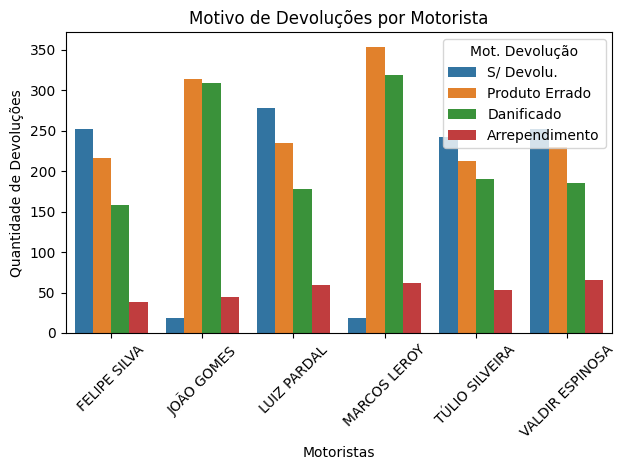

In [ ]:
#agrupa as colunas Motorista e Motivos de devolução em uma tabela e coloca a quantidade obtida pelo
qnt_dev_por_motorista = tabela_logistica.groupby('Motorista')['Mot. Devolução'].value_counts().reset_index(name='Quantidade')

sns.barplot(data=qnt_dev_por_motorista, x='Motorista', y='Quantidade', hue='Mot. Devolução')
plt.title('Motivo de Devoluções por Motorista')
plt.xlabel('Motoristas')
plt.ylabel('Quantidade de Devoluções')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

06) Mapear quantos produtos foram entregues fora do prazo

,Status,Quantidade
0,Atrasado,3135
1,No Prazo,1147


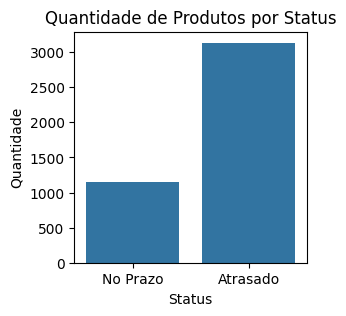

In [ ]:
qtd_status = tabela_logistica.value_counts('Status').reset_index(name='Quantidade')
display(qtd_status)

plt.figure(figsize=(3,3))
sns.countplot(data=tabela_logistica, x='Status')
plt.title('Quantidade de Produtos por Status')
plt.xlabel('Status')
plt.ylabel('Quantidade')
plt.show()

07) Quais motoristas atrasam mais a entrega dos produtos?

,Motorista,Status,Quantidade
0,FELIPE SILVA,Atrasado,469
1,FELIPE SILVA,No Prazo,195
2,JOÃO GOMES,Atrasado,494
3,JOÃO GOMES,No Prazo,191
4,LUIZ PARDAL,Atrasado,570
5,LUIZ PARDAL,No Prazo,180
6,MARCOS LEROY,Atrasado,567
7,MARCOS LEROY,No Prazo,186
8,TÚLIO SILVEIRA,Atrasado,501
9,TÚLIO SILVEIRA,No Prazo,197


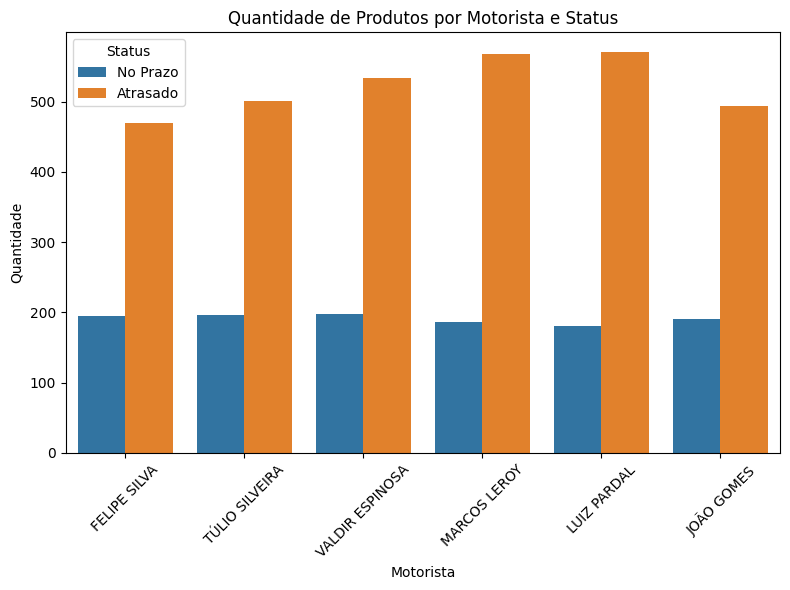

In [ ]:
qtd_motoristas_status = tabela_logistica.groupby('Motorista')['Status'].value_counts().reset_index(name='Quantidade')

display(qtd_motoristas_status)

plt.figure(figsize=(8,6))
sns.countplot(data=tabela_logistica, x='Motorista', hue='Status')
plt.title('Quantidade de Produtos por Motorista e Status')
plt.xlabel('Motorista')
plt.ylabel('Quantidade')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()